<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Sesión 5. Feature engineering-transformación y reescalamiento de variables</header1></centre>

Miller Janny Ariza Garzón <br>
Abril 2022

 
    
><figure><center>
  <img src="https://miro.medium.com/max/1400/1*K6ctE0RZme0cqMtknrxq8A.png" alt="EDA" width=600 height=600/>
  <a href="https://towardsdatascience.com/feature-engineering-what-powers-machine-learning-93ab191bcc2d">Source</a>
</figure><center> 

Los datos tienen que ser ajustados en características potenciales -variables de predicción- para que sean útiles para entrenar un modelo. Sin características relevantes, no se puede entrenar un modelo, por muy complejo que sea el algoritmo de aprendizaje automático. El proceso de extracción de características de un conjunto de datos se denomina ingeniería de características (feature engineering).

Se producen nuevas características tanto para el aprendizaje supervisado como para el no supervisado, con el objetivo de simplificar, acelerar procesos, ganar eficiencia, ajustar los datos, en función de la estrategía algorítmica propuesta, al tiempo que se mejora la precisión de los modelos.

### Scaling

Puede ser uno de los pasos importantes durante el preprocesamiento de datos antes de la modelación. Puede marcar la diferencia en el desempeño de algunos modelos. Cuando el conjunto de datos tiene múltiples características con diversos grados de magnitud, escala, rango y unidades, puede ser un obstáculo de desempeño y eficiencia (tiempos de convergencia) para algunos algoritmos de ML que son muy sensibles a estas componentes. 

Por ejemplo: Distance-Based Algorithms (KNN, K-means), médos clasicos de RNA, PCA, deeep learning, gradient descendent algorithms. Los algoritmos basados en árboles no son muy sensibles a estas transformaciones. 

Aplica principalmente a variables cuantitaivas.

#### Métodos de Scaling

Algunas de las transformaciones más utlizadas para realizar scaling se conocen como normalización y estandarización:

Estandarización:

\begin{equation*}
\frac{x_{i}-mean(x)}{standar\,deviation(x)}
\end{equation*}

Normalización:

\begin{equation*}
\frac{x_{i}-min(x)}{max(x)-min(x)}
\end{equation*}

Sin embargo, existen diversos métodos de escalamiento cuya elección dependen del modelo y del propósito. Una muestra de las trasnformaciones existentes son: 

+ **Min Max Scaler** (Normalization)
+ **Standard Scaler** (Standardization)
+ **Max Abs Scaler**: $\frac{x_{i}}{max(\mid x \mid)}$
+ **Robust Scaler**: $\frac{x_{i}-Q_{2}}{IQR}$
+ **Quantile Transformer Scaler**: Es una transformación no lineal para tratar con outliers. Utiliza por defecto la distribución uniforme, pero puede usar la distribución normal. La trasnformación consiste en aplicar una función inversa de la función de distribución acumulativa (FDC), bajo el supuesto de distribución uniforme o distribución normal. Como contras se encuentra que puede perder la la asociación entre las variables transformadas.
+ **Power Transformer Scaler**: Sigue la transformación de Box-Cox y la de Yeo-Johnson. La diferencia básica entre los métodos es los datos que permiten transformar - Box-Cox necesita que los datos sean positivos, mientras que Yeo-Johnson permite que los datos sean tanto negativos como positivos. El parámetro óptimo para estabilizar la varianza (reducir heterocedasticidad) y minimizar la asimetría se estima mediante **máxima verosimilitud**.

>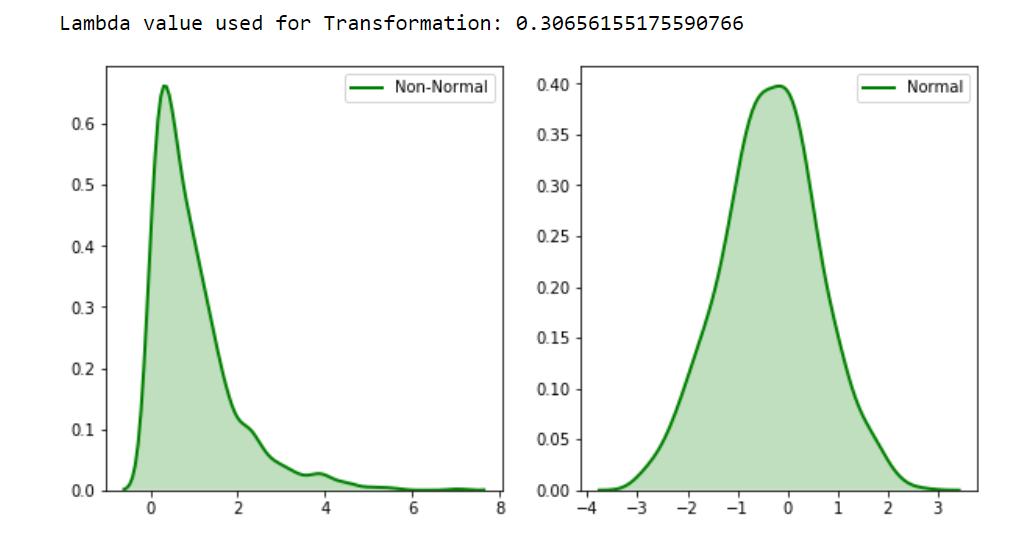

>Yeo-Johnson transformation:

>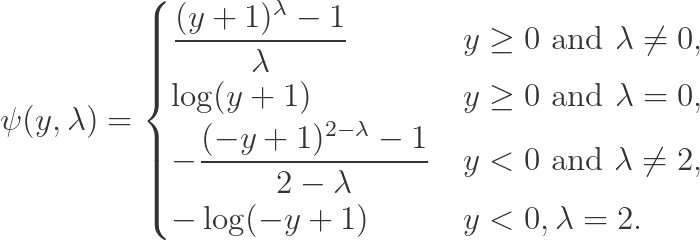
  
>Box-Cox transformation:

>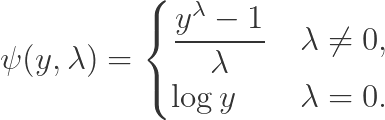
   
> * lambda = -1. is a reciprocal transform.
> * lambda = -0.5 is a reciprocal square root transform.
> * lambda = 0.0 is a log transform.
> * lambda = 0.5 is a square root transform.

+ **Unit Vector Scal/Normalizer**: La normalización es el proceso de escalar las muestras individuales para que tengan norma unitaria. Lo más interesante es que, a diferencia de los otros escaladores que trabajan sobre los valores individuales de las columnas, el normalizador trabaja sobre las filas. Cada fila del marco de datos con al menos un componente distinto de cero se reescala independientemente de otras muestras para que su norma ($l1$, $l2$ o $max$) sea igual a uno. El vector normalizado es $x/z$, con tres opciones para $z$, respectivamente:

\begin{equation*}
L1: z = \| x\|_1 = \sum_{i=1}^n |x_i| \\
L2: z = \| x\|_2 = \sqrt{\sum_{i=1}^n x_i^2} \\
Lmax: z = \max x_i
\end{equation*}


> A priori, no hay una manera clara de establecer que un transformador es mejor que el otro; lo que se puede hacer es aplicarlo y medir las métricas propuestas para decidir en función del desempeño y lo que se gana o pierde con la transformación.

> Un problema que puede surgir con este tipo de trasnformaciones es la perdida de explicabilidad e interpretabilidad.

### Encoding en variables categoricas 

Proceso para transformar variables categóricas en números. Aunque algunos algoritmos reconocen y permiten la inclusión de de variables categóricas directamente, muchos necesitan de esta transformación. 

También se da el caso de algoritmos que permiten entradas categóricas, e internamente realizan el proceso de codificación.

Entre las transformaciones más usadas se encuentran:


+ **One-hot encoding**: Transforma la variable categórica en diferentes variables booleanas (0/1) para indicar si cierta categoría o etiqueta es verdadera o no para cada observación.
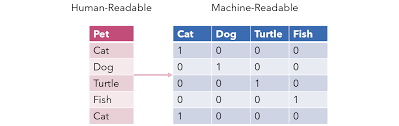
+ **Ordinal-encoding**: Trasnforma las categorías o etiquetas por algún número ordinal. Aplica a variables ordinales.
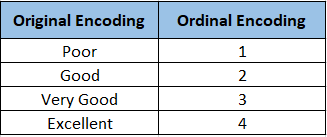
+ **Count/frequency encoding**: Transforma cada categoría de la variable categórica por el recuento/frecuencia dentro de esa categoría.
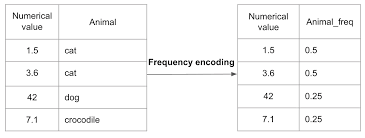
+ **Mean encoding**: Transforma la categoría por la media del objetivo para esa categoría. Preferiblemente en problemas con variable objetivo continua.
+ **WOE encoding**: Principalmente usado en problemas de clasificación binarios. Transforma cada categoría por el peso de la evidencia de esa categoría. El peso de la evidencia se calcula con base en el odds ratio. Muy usado en problemas de riesgo de crédito. 

\begin{align}
\text{WoE=} \qquad &\ln \frac{\text{Distr Good}}{\text{Distr Bad}}\\[10pt]
\end{align}

### Discretización en k-Bins 

La discretización es un proceso de transformación de una característica continua en una característica categórica, dividiéndola en varios intervalos dentro del rango de valores esperados. La binarización booleana es un caso particular que utiliza un determinado umbral para transformar la variable continua en una variable categórica. Puede ayudar en el desempeño de los modelos (hay que probarlo en cada caso), minimiza el impacto de valores extremos, entre otras ventajas.

Existen diversas formas de discretizar variables en k-bins, las más conocidas son binning de igual anchura o de igual frecuencia (por ej. con percentiles). También se puede usar k-means, decision trees, CHAID Algorithm entre otras opciones.

## Ejemplo: Titanic Dataset

In [2]:
#De la sesión anterior
import pandas as pd
import seaborn as sns
df=sns.load_dataset('titanic')
df.replace({False: 0, True: 1}, inplace=True)
df['adult_male'] = df['adult_male'].map({1: 'adult_male', 0: 'non-adult_male'})
df['alone'] = df['alone'].map({1: 'alone', 0: 'non-alone'})
df.loc[:, df.dtypes == 'object'] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))
df= df.drop(columns=['survived', 'pclass', 'embarked'], errors='ignore')
df_one = pd.get_dummies(df["alive"], drop_first=True)
df_two = pd.concat((df_one, df), axis=1)
df_two = df_two.drop(["alive"], axis=1)
df = df_two.rename(columns={"yes": "alive"})
df.head()

,alive,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,man,adult_male,NaN,Southampton,non-alone
1,1,female,38.0,1,0,71.2833,First,woman,non-adult_male,C,Cherbourg,non-alone
2,1,female,26.0,0,0,7.9250,Third,woman,non-adult_male,NaN,Southampton,alone
3,1,female,35.0,1,0,53.1000,First,woman,non-adult_male,C,Southampton,non-alone
4,0,male,35.0,0,0,8.0500,Third,man,adult_male,NaN,Southampton,alone


Recordemos las variables:

+ sex: Sex
+ age: Age
+ sibsp: Number of siblings/spouses aboard
+ parch: Number of parents/children aboard
+ fare: Passenger fare (British pound)
+ adult_male: A male 18 or older (0 = No, 1=Yes)
+ deck: Deck of the ship
+ who: man (18+), woman (18+), child (<18)
+ **alive**: Yes, no (survived)
+ embarked_town: Port of embarkation ( Cherbourg, Queenstown, Southampton)(embarked)
+ class: Passenger class (1st; 2nd; 3rd) (pclass)
+ alone: 1= alone, 0= not alone ( you have at least 1 sibling, spouse, parent or child on board) (sibsp, parch)

## Transformación Dataset de ejemplo. Imputación sesión anterior

### Imputación missing value de age

In [3]:
# Age
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#df.dropna(subset=['age'])
im_mean=SimpleImputer(missing_values=np.nan, strategy='mean')
im_mean=im_mean.fit(df[['age']])
df['age_miu'] = im_mean.transform(df[['age']])

im_median=SimpleImputer(missing_values=np.nan, strategy='median')
im_median=im_median.fit(df[['age']])
df['age_med'] = im_median.transform(df[['age']])

iter_imputer = IterativeImputer(estimator=lr,missing_values=np.nan, 
                                max_iter=10,random_state=0)
#otros estimadores: BayesianRidge o ExtraTreeRegressor
iter_imputer= iter_imputer.fit(df[['age']])
df['age_mice']=iter_imputer.transform(df[['age']])

knn_imputer = KNNImputer(n_neighbors=4, weights="uniform")
knn_imputer  = knn_imputer.fit(df[['age']])
df['age_knn']=knn_imputer.transform(df[['age']])

###imputer ad-hoc
df['age_ah'] = df['age'].groupby([df['class'], df['sex']]).apply(lambda x: x.fillna(x.median()))
display(df[df.age.isnull()].head())

,alive,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alone,age_miu,age_med,age_mice,age_knn,age_ah
5,0,male,NaN,0,0,8.4583,Third,man,adult_male,NaN,Queenstown,alone,29.699118,28.0,29.699118,29.699118,25.0
17,1,male,NaN,0,0,13.0000,Second,man,adult_male,NaN,Southampton,alone,29.699118,28.0,29.699118,29.699118,30.0
19,1,female,NaN,0,0,7.2250,Third,woman,non-adult_male,NaN,Cherbourg,alone,29.699118,28.0,29.699118,29.699118,21.5
26,0,male,NaN,0,0,7.2250,Third,man,adult_male,NaN,Cherbourg,alone,29.699118,28.0,29.699118,29.699118,25.0
28,1,female,NaN,0,0,7.8792,Third,woman,non-adult_male,NaN,Queenstown,alone,29.699118,28.0,29.699118,29.699118,21.5


In [4]:
#Podemos decidir extraer las variables similares
df= df.drop(columns=['age_knn', 'age_mice'], errors='ignore')

### Imputación missing value de  embark_town

In [5]:
#embark_town
#df.dropna(subset=['embark_town'],how='any',inplace=True)# eliminar faltantes
imputer_mf = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer_mf= imputer_mf.fit(df[['embark_town']])
df['embark_town']=imputer_mf.transform(df[['embark_town']])
df['embark_town'].isnull().sum()

0

## Transformación de variables

### Binning

In [6]:
# Categorizar, discretizar o Binning de Age, Fare
# Hay diversas formas de hacer binning. Usaremos la función qcut() que genera intervalos por quantiles.
df['age_ah_qbin'] = pd.qcut(df['age_ah'], q=10, precision=0)
df['fare_qbin'] = pd.qcut(df['fare'], q=10, precision=2)

##Creating bins and labels
bins = [1,10,20,40,60,100]
labels = ['bin1','bin2','bin3','bin4','bin5']
df['age_ah_range'] = pd.cut(df['age_ah'],bins = bins, labels = labels)

df['age_ah_qp'] = pd.qcut(df['age_ah'], q=[0, .25, .4, .65, .8, 1], precision=0)
#labels=False..return only integer indicators of the bins
df.head()

,alive,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alone,age_miu,age_med,age_ah,age_ah_qbin,fare_qbin,age_ah_range,age_ah_qp
0,0,male,22.0,1,0,7.2500,Third,man,adult_male,NaN,Southampton,non-alone,22.0,22.0,22.0,"(20.0, 22.0]","(-0.01, 7.55]",bin3,"(22.0, 25.0]"
1,1,female,38.0,1,0,71.2833,First,woman,non-adult_male,C,Cherbourg,non-alone,38.0,38.0,38.0,"(34.0, 40.0]","(39.69, 77.96]",bin3,"(32.0, 40.0]"
2,1,female,26.0,0,0,7.9250,Third,woman,non-adult_male,NaN,Southampton,alone,26.0,26.0,26.0,"(25.0, 26.0]","(7.85, 8.05]",bin3,"(25.0, 32.0]"
3,1,female,35.0,1,0,53.1000,First,woman,non-adult_male,C,Southampton,non-alone,35.0,35.0,35.0,"(34.0, 40.0]","(39.69, 77.96]",bin3,"(32.0, 40.0]"
4,0,male,35.0,0,0,8.0500,Third,man,adult_male,NaN,Southampton,alone,35.0,35.0,35.0,"(34.0, 40.0]","(7.85, 8.05]",bin3,"(32.0, 40.0]"


### Encoder

In [7]:
#!pip install category_encoders
import category_encoders as ce
import pandas as pd

encoder=ce.OneHotEncoder(cols=['sex', 'who', 'embark_town', 'fare_qbin', 'age_ah_qbin'],handle_unknown='return_nan',return_df=True,use_cat_names=True)
df_encoded = encoder.fit_transform(df)

# class variable ordinal
encoder_ord=ce.OrdinalEncoder(cols=['class'],return_df=True)
df_encoded = encoder_ord.fit_transform(df_encoded)

df_encoded.info()
df_encoded.head()

ModuleNotFoundError: No module named 'category_encoders'

### Scaler:Normalización y estandarización variables continuas: Age, Fare

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

df_encoded[['age_ah_sd', 'fare_sd']] = StandardScaler().fit_transform(df_encoded[['age_ah', 'fare']])
df_encoded[['age_ah_mm', 'fare_mm']] = MinMaxScaler(feature_range=(-1,1)).fit_transform(df_encoded[['age_ah', 'fare']])

df_encoded[['age_ah','fare','age_ah_sd', 'fare_sd','age_ah_mm', 'fare_mm']].head()

NameError: name 'df_encoded' is not defined

### PowerTransformer

In [9]:
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot

# power transform the raw data
#'box-cox'
power = PowerTransformer(method='yeo-johnson', standardize=True)
df_encoded['age_ah_yj']= pd.DataFrame(power.fit_transform(df_encoded['age_ah'].to_frame()))[0]
print(power.lambdas_)

pyplot.hist(df_encoded['age_ah'], bins=25)
pyplot.show()
pyplot.hist(df_encoded['age_ah_sd'], bins=25)
pyplot.show()
pyplot.hist(df_encoded['age_ah_yj'], bins=25)
pyplot.show()

NameError: name 'df_encoded' is not defined

In [10]:
df_encoded.head()

NameError: name 'df_encoded' is not defined

## Próxima sesión
+ Feature Selection y PCA
+ Evaluación de modelos 

## Info de la sesión

In [11]:
import session_info
session_info.show()

ModuleNotFoundError: No module named 'session_info'